# FEATURE EXTRACTION WITH DATA AUGMENTATION

In [6]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [7]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [8]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [10]:
print('This is the number of trainable weights '
'before freezing the conv base:', len(model.trainable_weights))

conv_base.trainable = False

print('This is the number of trainable weights '
'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


**5.21 | Training the model end to end with a frozen convolutional base**

In [11]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

base_dir = '/content/drive/MyDrive/cats_and_dogs'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 370s 4s/step - loss: 0.5897 - acc: 0.6945 - val_loss: 0.4491 - val_acc: 0.8330
Epoch 2/30
100/100 [==============================] - 26s 263ms/step - loss: 0.4801 - acc: 0.7880 - val_loss: 0.3702 - val_acc: 0.8500
Epoch 3/30
100/100 [==============================] - 26s 259ms/step - loss: 0.4220 - acc: 0.8115 - val_loss: 0.3204 - val_acc: 0.8770
Epoch 4/30
100/100 [==============================] - 26s 258ms/step - loss: 0.4026 - acc: 0.8225 - val_loss: 0.3075 - val_acc: 0.8690
Epoch 5/30
100/100 [==============================] - 26s 256ms/step - loss: 0.3885 - acc: 0.8330 - val_loss: 0.2875 - val_acc: 0.8930
Epoch 6/30
100/100 [==============================] - 25s 254ms/step - loss: 0.3631 - acc: 0.8425 - val_loss: 0.2888 - val_acc: 0.8800
Epoch 7/30
100/100 [==============================] - 32s 318ms/step - loss: 0.3489 - acc: 0.8520 - val_loss

In [12]:
model.save('/content/drive/MyDrive/Colab Notebooks/cats_and_dogs_small_3.h5')

 **5.19 | Plotting the results**

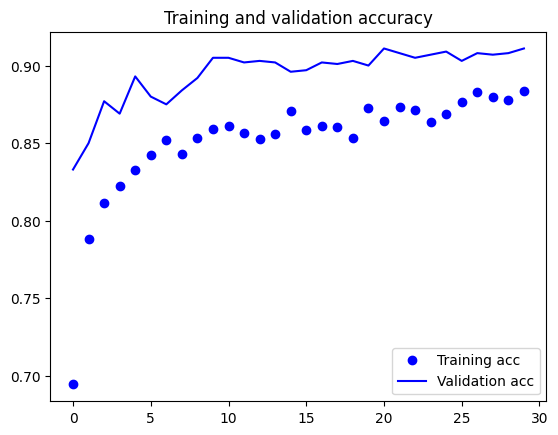

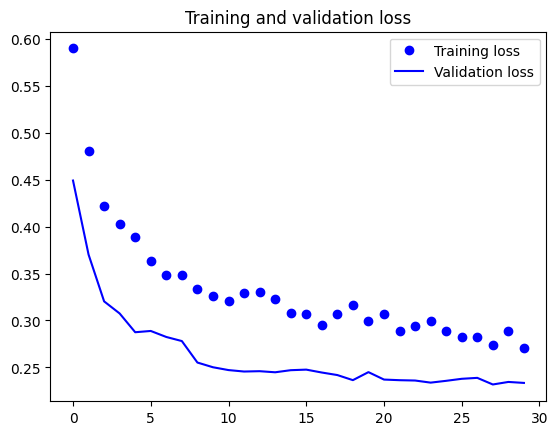

In [13]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# **5.3.2 | Fine Tuning**

In [14]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [15]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

**5.23 | Fine-Tuning the Model**

In [16]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
<ipython-input-16-a643c9c0098e>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
100/100 [==============================] - 29s 261ms/step - loss: 0.2951 - acc: 0.8700 - val_loss: 0.2072 - val_acc: 0.9200
Epoch 2/100
100/100 [==============================] - 26s 259ms/step - loss: 0.2452 - acc: 0.8995 - val_loss: 0.1995 - val_acc: 0.9260
Epoch 3/100
100/100 [==============================] - 26s 257ms/step - loss: 0.2486 - acc: 0.9005 - val_loss: 0.1974 - val_acc: 0.9240
Epoch 4/100
100/100 [==============================] - 31s 309ms/step - loss: 0.2183 - acc: 0.9030 - val_loss: 0.1994 - val_acc: 0.9270
Epoch 5/100
100/100 [==============================] - 26s 258ms/step - loss: 0.2156 - acc: 0.9140 - val_loss: 0.1852 - val_acc: 0.9330
Epoch 6/100
100/100 [==============================] - 27s 274ms/step - loss: 0.2048 - acc: 0.9150 - val_loss: 0.1855 - val_acc: 0.9320
Epoch 7/100
100/100 [==============================] - 26s 260ms/step - loss: 0.1745 - acc: 0.9270 - val_loss: 0.2060 - val_acc: 0.9250
Epoch 8/100
100/100 [===========================

In [17]:
model.save('cats_and_dogs_small_4.h5')

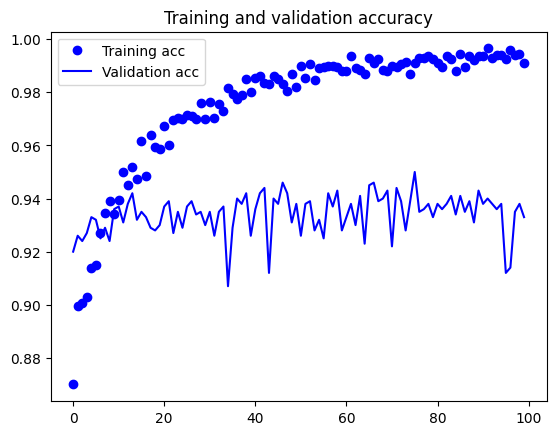

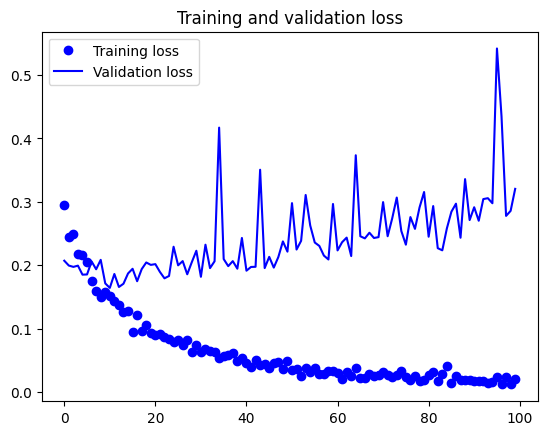

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

 **5.24 | Smoothing the plots**

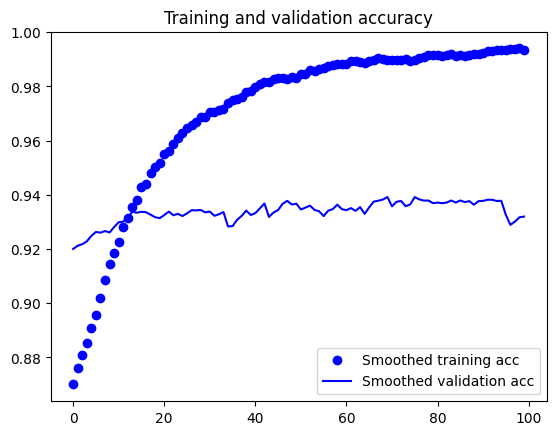

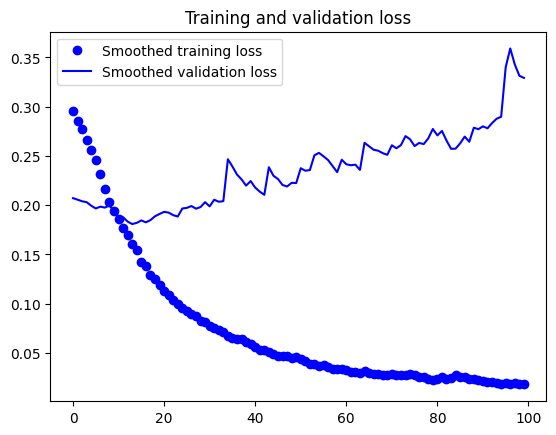

In [19]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()